## Predicting DAX Movement using KNN and Nonlinear SVM Classification

**Nils Marthiensen - MatNr.: 17203238 - 7. Semester CME**

Importing the necessary libraries

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import confusion_matrix, accuracy_score

Importing the data set

In [4]:
HistoricDAXValues = pd.read_csv('HistoricDAXValues.csv', low_memory=False, delimiter=';')
print(HistoricDAXValues)

           Datum    Schluss  Eröffnung  Tageshoch  Tagestief Rechnung  \
0     24.11.2020  13.292,44  13.254,42  13.296,76  13.192,32     2,64   
1     23.11.2020  13.126,97  13.215,44  13.312,42  13.126,97  -165,47   
2     20.11.2020  13.137,25  13.054,64  13.172,91  13.054,64    10,28   
3     19.11.2020  13.086,16  13.101,71  13.138,14  13.034,51   -51,09   
4     18.11.2020  13.201,89  13.086,43  13.213,63  13.074,67   115,73   
...          ...        ...        ...        ...        ...      ...   
1257  02.12.2015  11.190,02  11.301,51  11.329,79  11.188,03   400,78   
1258  01.12.2015  11.261,24  11.422,47  11.430,38  11.235,97    71,22   
1259  30.11.2015  11.382,23  11.268,31  11.430,87  11.253,37   120,99   
1260  27.11.2015  11.293,76  11.277,91  11.354,01  11.247,14   -88,47   
1261  26.11.2015  11.320,77  11.180,94  11.366,37  11.176,56    27,01   

      Ergebnis  
0            0  
1            1  
2            0  
3            1  
4            0  
...        ...  
1257

Preparing the data

In [5]:
HistoricDAXValues = HistoricDAXValues.drop(columns = {'Datum'})
HistoricDAXValues = HistoricDAXValues.drop(columns = {'Rechnung'})

In [6]:
HistoricDAXValues['Schluss'] = HistoricDAXValues['Schluss'].str.replace('.', '').str.replace(',', '.')
HistoricDAXValues['Eröffnung'] = HistoricDAXValues['Eröffnung'].str.replace('.', '').str.replace(',', '.')
HistoricDAXValues['Tageshoch'] = HistoricDAXValues['Tageshoch'].str.replace('.', '').str.replace(',', '.')
HistoricDAXValues['Tagestief'] = HistoricDAXValues['Tagestief'].str.replace('.', '').str.replace(',', '.')

In [7]:
HistoricDAXValues = HistoricDAXValues.dropna(axis='rows', how='any')
HistoricDAXValues.head

<bound method NDFrame.head of        Schluss Eröffnung Tageshoch Tagestief  Ergebnis
0     13292.44  13254.42  13296.76  13192.32         0
1     13126.97  13215.44  13312.42  13126.97         1
2     13137.25  13054.64  13172.91  13054.64         0
3     13086.16  13101.71  13138.14  13034.51         1
4     13201.89  13086.43  13213.63  13074.67         0
...        ...       ...       ...       ...       ...
1257  11190.02  11301.51  11329.79  11188.03         0
1258  11261.24  11422.47  11430.38  11235.97         0
1259  11382.23  11268.31  11430.87  11253.37         0
1260  11293.76  11277.91  11354.01  11247.14         1
1261  11320.77  11180.94  11366.37  11176.56         0

[1262 rows x 5 columns]>

Splitting the data in X and y for classes and labels

In [6]:
HistoricDAXValues = HistoricDAXValues[['Schluss','Eröffnung','Tageshoch','Tagestief','Ergebnis']]
X = HistoricDAXValues.iloc[:, :-1].values
y = HistoricDAXValues.iloc[:, -1].values

Splitting the data into training and test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

Introducing the KNN model

In [8]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

Printing the predictions vs. the real values

In [9]:
y_pred = KNN_classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]

Accuracy of the predictions

In [10]:
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.5646437994722955

Visualizing the results in a confusion matrix

In [11]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt. xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[120  55]
 [110  94]]


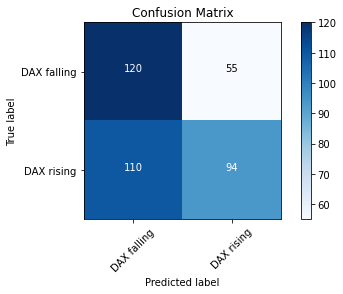

In [12]:
cm_plot_labels = ['DAX falling','DAX rising']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Introducing the SVM model

In [13]:
SVclassifier = SVC(kernel = 'rbf', random_state = 123)
SVclassifier.fit(X_train, y_train)

SVC(random_state=123)

Printing the predictions vs. the real values

In [14]:
y_pred = SVclassifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]

Accuracy of the predictions

In [15]:
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.5408970976253298

Visualizing the results in a confusion matrix

In [16]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt. xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 80  95]
 [ 79 125]]


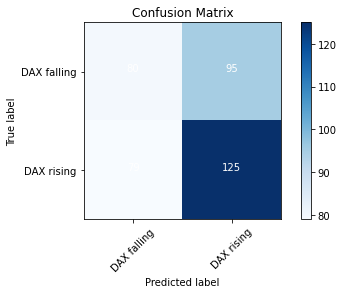

In [17]:
cm_plot_labels = ['DAX falling','DAX rising']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')